In [195]:
import tensorflow as tf
import keras as ks
from keras import models
from keras import metrics
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection

In [196]:
data=pd.read_csv('/content/META.csv').round(2)

In [197]:
puredata=pd.read_csv('/content/META.csv').round(2)

In [198]:
data=data.sample(frac=1).dropna()
data

,Date,High,Low,Adj Close,Open,Volume,Close,Interest,Currency,Inflation,Day,Month
782,2015-07-02,87.44,86.34,87.29,87.40,16908800,87.29,2.32,0.64,0.2,2,7
122,2012-11-15,22.50,21.65,22.17,22.34,78857700,22.17,1.65,0.63,1.8,15,11
1372,2017-11-02,181.94,177.34,178.92,180.63,35529900,178.92,2.35,0.76,2.2,2,11
685,2015-02-12,76.87,75.89,76.23,76.86,17235000,76.23,1.98,0.65,0.0,12,2
618,2014-11-05,76.80,74.42,74.83,76.51,35913000,74.83,2.33,0.63,1.3,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2020-11-05,297.38,288.95,294.68,291.90,23823600,294.68,0.87,0.76,1.2,5,11
1850,2019-09-30,178.67,176.85,178.08,177.87,10740000,178.08,1.70,0.81,1.7,30,9
775,2015-06-23,87.97,84.76,87.88,84.96,50667900,87.88,2.36,0.64,0.1,23,6
2627,2022-10-28,100.85,97.51,99.20,99.58,95928300,99.20,3.98,0.88,7.7,28,10


In [199]:
train=data.iloc[:int(0.8*len(data))]
test=data.iloc[int(0.8*len(data)):]

In [200]:
test.to_csv('testing_dataset.csv')
train.to_csv('training_dataset.csv')

In [201]:
train.tail()

,Date,High,Low,Adj Close,Open,Volume,Close,Interest,Currency,Inflation,Day,Month
2281,2021-06-16,337.55,328.72,331.08,336.70,17232200,331.08,1.52,0.71,5.4,16,6
2488,2022-04-11,220.61,215.22,216.46,218.42,20516600,216.46,2.75,0.77,8.3,11,4
1759,2019-05-21,185.70,183.89,184.82,184.57,7502800,184.82,2.40,0.78,1.8,21,5
359,2013-10-25,53.24,51.88,51.95,53.18,45085000,51.95,2.62,0.62,1.0,25,10
464,2014-03-28,61.95,59.34,60.01,61.34,67052000,60.01,2.72,0.60,1.5,28,3


In [202]:
X=train.iloc[:,[1,2,4,7,8,9,10,11]]
X.head()

,High,Low,Open,Interest,Currency,Inflation,Day,Month
782,87.44,86.34,87.40,2.32,0.64,0.2,2,7
122,22.50,21.65,22.34,1.65,0.63,1.8,15,11
1372,181.94,177.34,180.63,2.35,0.76,2.2,2,11
685,76.87,75.89,76.86,1.98,0.65,0.0,12,2
618,76.80,74.42,76.51,2.33,0.63,1.3,5,11


In [203]:
Y=train.iloc[:,[6]]
Y.head()

,Close
782,87.29
122,22.17
1372,178.92
685,76.23
618,74.83


In [204]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [232]:
metric=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError(),metrics.MeanAbsolutePercentageError(),metrics.MeanSquaredLogarithmicError()]
def modelbuild():
    model = models.Sequential()
    model.add(ks.layers.Reshape((1,8,),input_shape=(8,)))
    model.add(ks.layers.LSTM(48, return_sequences=True, activation='relu', input_shape=(1,8,)))

    #model.add(ks.layers.Dropout(0.2))
    model.add(ks.layers.LSTM(6,activation='relu'))

    model.add(ks.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=metric)
    return model
model=modelbuild()

In [206]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_11 (Reshape)        (None, 1, 8)              0         
                                                                 
 lstm_21 (LSTM)              (None, 1, 128)            70144     
                                                                 
 dropout_10 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_22 (LSTM)              (None, 64)                49408     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 119,617
Trainable params: 119,617
Non-trainable params: 0
_________________________________________________________________


In [207]:
x_train['Currency']=x_train['Currency'].astype(np.float64)
x_train['Interest']=x_train['Interest'].astype(np.float64)
x_train['Inflation']=x_train['Inflation'].astype(np.float64)
x_test['Currency']=x_test['Currency'].astype(np.float64)
x_test['Interest']=x_test['Interest'].astype(np.float64)
x_test['Inflation']=x_test['Inflation'].astype(np.float64)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 682 to 1461
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1748 non-null   float64
 1   Low        1748 non-null   float64
 2   Open       1748 non-null   float64
 3   Interest   1748 non-null   float64
 4   Currency   1748 non-null   float64
 5   Inflation  1748 non-null   float64
 6   Day        1748 non-null   int64  
 7   Month      1748 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 122.9 KB


In [233]:
stop = ks.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test),callbacks=[stop])
#training the model

test_loss, rmse, mae, mape, msle = model.evaluate(x_test, y_test, verbose=2)

print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)

Epoch 1/100
55/55 [==============================] - 6s 19ms/step - loss: 28627.7480 - root_mean_squared_error: 169.1974 - mean_absolute_error: 145.7939 - mean_absolute_percentage_error: 99.8160 - mean_squared_logarithmic_error: 22.5867 - val_loss: 29085.1641 - val_root_mean_squared_error: 170.5437 - val_mean_absolute_error: 147.9509 - val_mean_absolute_percentage_error: 96.8080 - val_mean_squared_logarithmic_error: 10.8866
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 11004.0986 - root_mean_squared_error: 104.9004 - mean_absolute_error: 72.6637 - mean_absolute_percentage_error: 49.4727 - mean_squared_logarithmic_error: 2.0612 - val_loss: 81.3049 - val_root_mean_squared_error: 9.0169 - val_mean_absolute_error: 7.9071 - val_mean_absolute_percentage_error: 8.0687 - val_mean_squared_logarithmic_error: 0.0097
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 23.4172 - root_mean_squared_error: 4.8391 - mean_absolute_error: 3.6273 - mean_abso

In [234]:
X=test.iloc[:,[1,2,4,7,8,9,10,11]]
Y=test.iloc[:,[6]]

In [235]:
X=X.astype(np.float64)
X.tail()

,High,Low,Open,Interest,Currency,Inflation,Day,Month
2129,297.38,288.95,291.90,0.87,0.76,1.2,5.0,11.0
1850,178.67,176.85,177.87,1.70,0.81,1.7,30.0,9.0
775,87.97,84.76,84.96,2.36,0.64,0.1,23.0,6.0
2627,100.85,97.51,99.58,3.98,0.88,7.7,28.0,10.0
2191,269.17,265.67,266.80,1.26,0.72,1.7,5.0,2.0


In [236]:
Y.tail()

,Close
2129,294.68
1850,178.08
775,87.88
2627,99.20
2191,268.10


In [237]:
test_loss, rmse, mae, mape, msle = model.evaluate(X,Y, verbose=1)
print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)
print("Want to save model?")
c=input()
if c=='y':
  ks.Model.save(model,'/content/models')

18/18 [==============================] - 0s 8ms/step - loss: 4.8053 - root_mean_squared_error: 2.1921 - mean_absolute_error: 1.5041 - mean_absolute_percentage_error: 1.0771 - mean_squared_logarithmic_error: 2.1877e-04

Mean Squared Error:  4.805281639099121
Root Mean Squared Error:  2.1920952796936035
Mean Absolute Error:  1.5040771961212158
Mean Absolute Percentage Error:  1.0770559310913086
Mean Squared Logarithmic Error:  0.00021876882237847894
Want to save model?
y


In [238]:
PX=puredata.iloc[:,[1,2,4,7,8,9,10,11]].dropna()
PY=puredata.iloc[:,[6]]
predicted_prices=model.predict(PX.astype(np.float64))

86/86 [==============================] - 1s 3ms/step


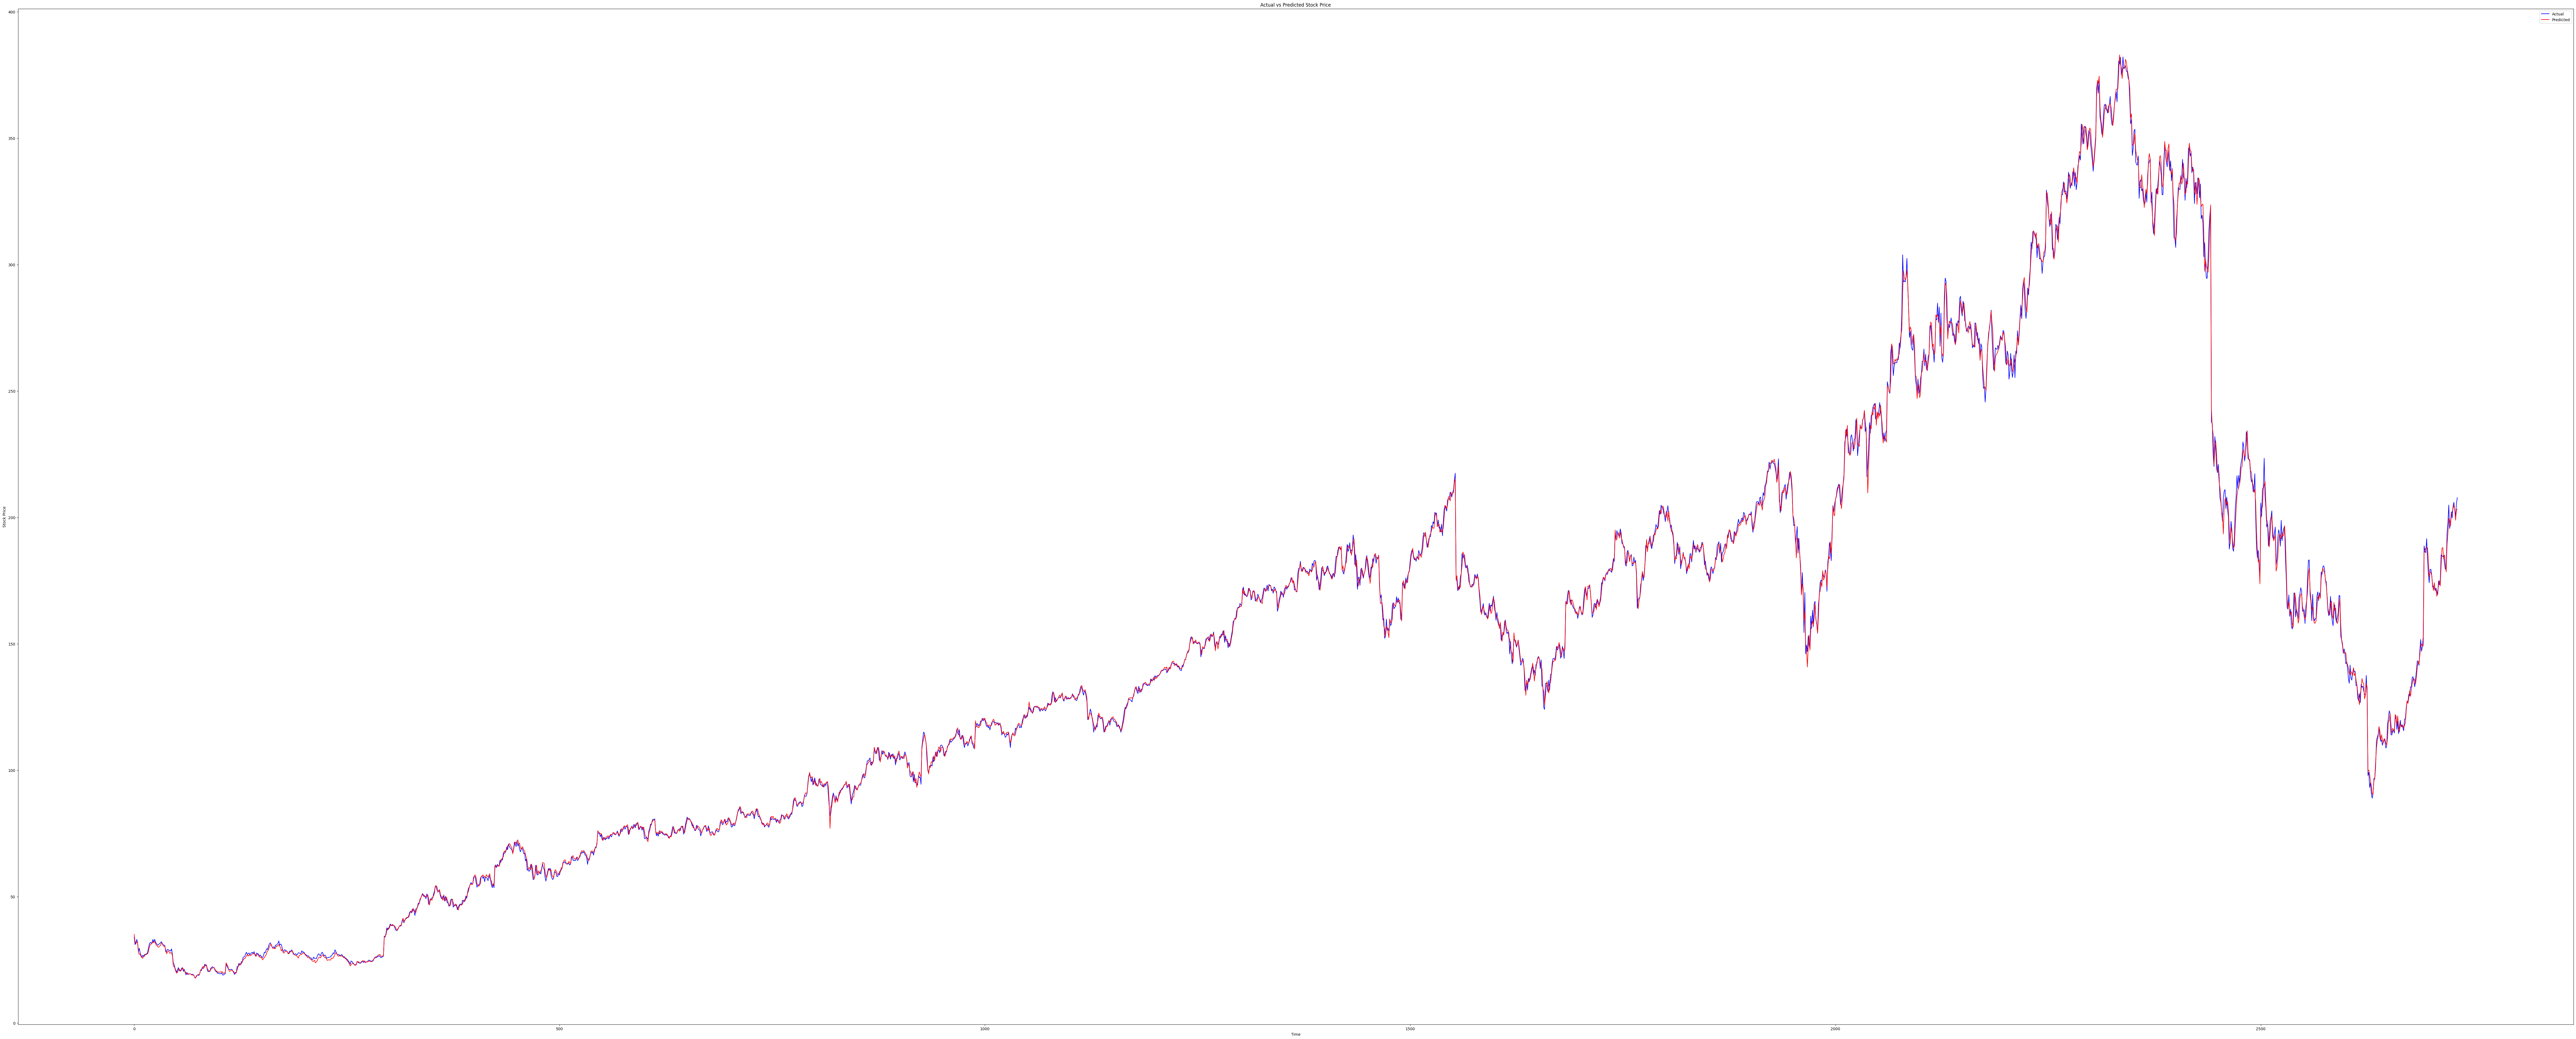

In [239]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(120,48))
plt.plot(PY['Close'], color='blue', label='Actual')
plt.plot(predicted_prices, color='red', label='Predicted')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()

plt.show()